# Part 1 Background Info

1) What is the difference between linear and logistic regression?
    
    - Linear Regression is used for regression on contiuous data, provides a continous output, and provides us with the line of best-fit for our set of data.
    
    - Logistic Regression is used for discrete/categorical data, provides us with discreet/categorical output, and provides us with a sigmoid curve that allows for predictions/classifications.
    
    
2) What is the difference between predictors and response variables?
   
    - Predictors are the variables in which can have an effect on the response, these can be measured by a model. These are also known as the independent variables that provide information about the dependent variables.
    
    - Response variables are the variables in which we are interested in, the ones we are trying to predict. These are also called indepenent variables that we are trying to figure out based on some experiments to some data.
    
    
3) What is the purpose and benefits of preprocessing data?
    
    - The purpose of processing the data is so we are able to work with data that will maximze the accuracies of the predictions we made on some data which allows our models to be more reliable. This can be a multitude of things like making sure the variables we are working with are scaled, making sure that for categorical data we convert them into dummies that provide better information, etc. The benefits of this is getting more accurate predictions and a better understanding of what the data is telling us. 
    
    
4) What is overfitting and underfitting that data? What are the consequences.
    
    - Overfitting is when the model we use on the data is too fit to just the training data provided that if any new data, or outliers, were to be added it would cause for poor performance resulting in a high error rate.
    
    - Underfitting is the opposite of overfitting in which our model doesn't fit our data properly, so it results in poor performance with both our training data and any new data, or outliers, added. The error rate is always large. 

# Part 2 About the Data

The dataset contains the following 15 features:
    
    -ID: The title ID on JustWatch.
    
    -title: The name of the title.
    
    -show type: TV show or movie.
    
    -description: A brief description.
    
    -release year: The release year.
    
    -age certification: The age certification.
    
    -runtime: The length of the episode (SHOW) or movie.
    
    -genres: A list of genres.
    
    -production countries: A list of countries that produced the title.
    
    -seasons: Number of seasons if it's a SHOW.
    
    -IMDB ID: The title ID on IMDB.
    
    -IMDB Score: Score on IMDB.
    
    -IMDB Votes: Votes on IMDB.
    
    -TMDB Popularity: Popularity on TMDB.
    
    -TMDB Score: Score on TMDB.

# Questions

1) What are the features? Response variable? Describe each.

The features we're using from this dataset are:
- type: tells us if an attribute is a show or a movie
- genre: tells us what genre a movie/show belongs to
- runtime: the time it takes for an object to be watched
- production countries: what countries was the film/show filmed in
- seasons: how many seasons has a show had
- imdb votes: how many votes did the show/film recieve on imdb
- imdb popularity: how popular the show/film is on imdb
- imdb id: the id used ot identify the film/show on imdb
- tmdb votes: the amount of votes the show/film got on tmdb
- title: the title of the show/film
- tmdb score: the score the show/film recieved on tmdb

Our response variable will be the imdb score, which is the score a film/show recieves on imdb based on its quality.
    
    
2) Which features would you classify as categorical vs. continuous?Explain.

For this dataset, the categorical variables would be type, genres, title, and production countries. These would be considered categorical because the domain of the values is fixed and are qualitative in nature, thus there can only be so many outcomes for each variable, such as type being only "movie" or "show". For our continuous variables, we have release year, runtime, seasons, imdb id, imdb score, imdb votes, imdb popularity, imdb score, tmdb votes, and tmdb score. These are considered continuous since by nature, their values are derrived from counting, and in some cases, measurements such as averaging. Something such as the imdb score would be considered continuous since its the average of all user-submited votes, thus a measurement, and this hold true for the rest of our continuous variables.
    

# Problem Statement

put what the statement is and 3-6 sentences the significance of addressing the issue and the benefits our modeling can provide**********
 it is basically figuring out if the type	release_year	runtime	genres	production_countries imdb_votes	tmdb_popularity	tmdb_score affect the results of the imdb_score being good or bad and that good/bad is stored in the column called good_score that is a 1 for >5.0 and a 0 for <5.0

***************shaz and chi answer the problem statement*****************

### Goal: Predict the imdb rating of a movie or show on netflix (1 for good and 0 for bad)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# aaron
data = pd.read_csv('titles.csv')

In [3]:
# aaron
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [4]:
# aaron
data.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


In [5]:
# aaron
data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


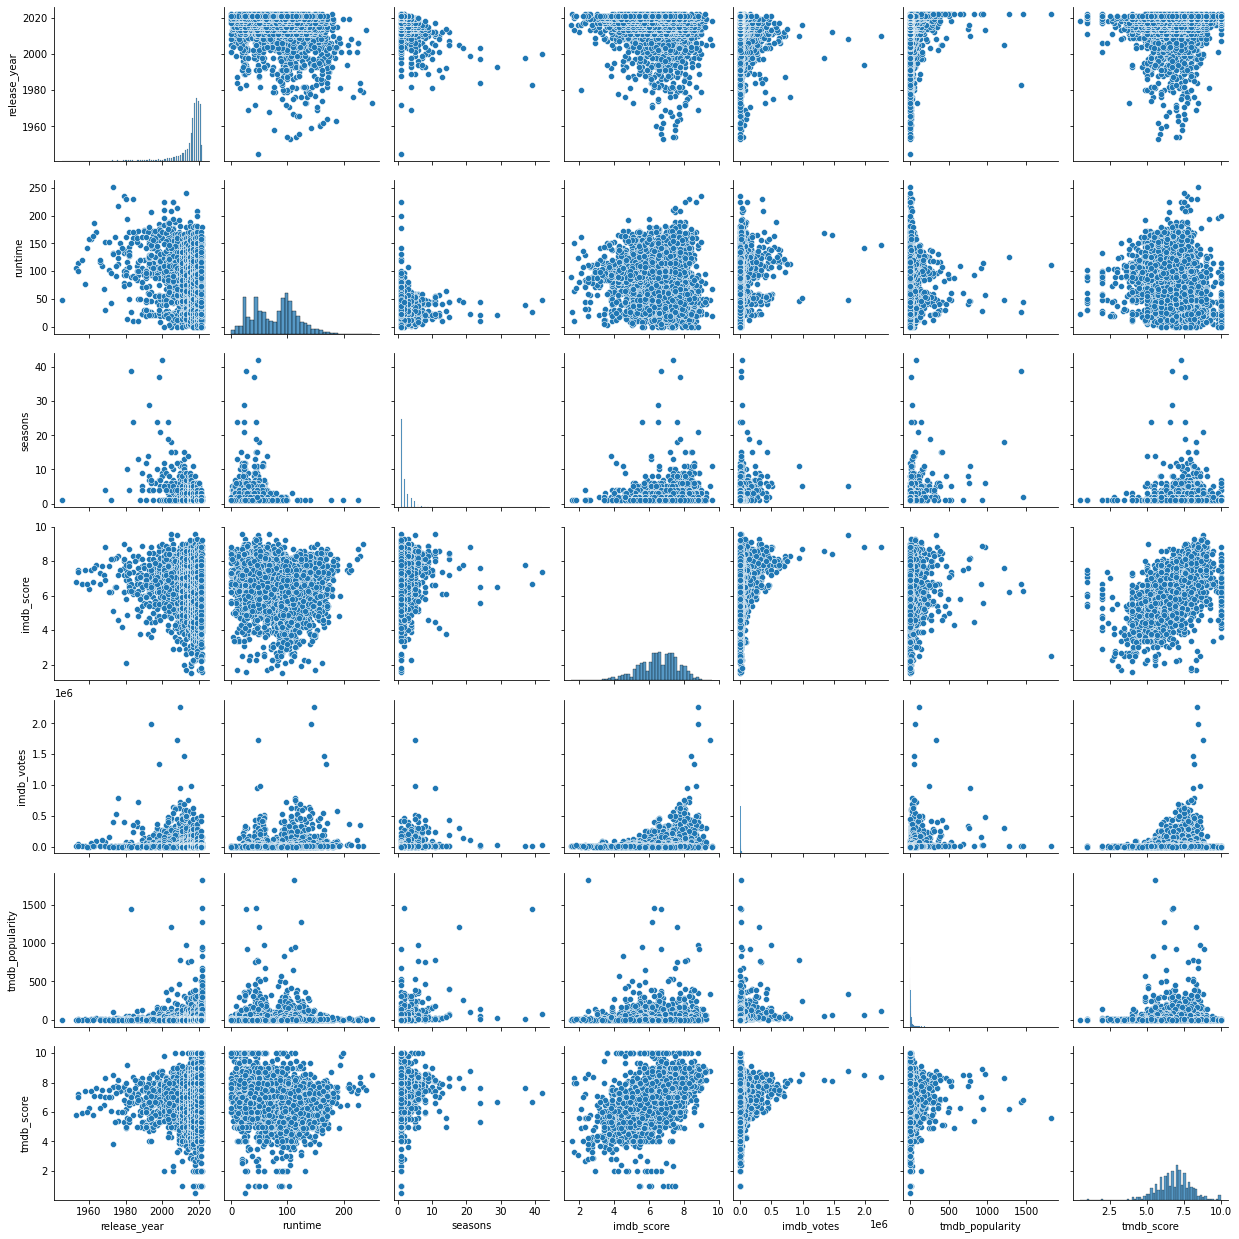

In [6]:
# angelita
sns.pairplot(data)
plt.show()

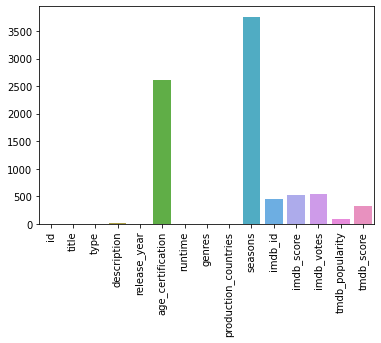

In [7]:
#angelita
sns.barplot(x = data.columns, y = data.isnull().sum().values)
plt.xticks(rotation = 90)
plt.show()

there are null values in age_certification, seasons, imdb_id, imdb_score, imdb_votes, tmdb_popularity, and tmdb_score.

In [8]:
# angelita 
data.isnull()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True
5802,False,False,False,False,False,True,False,False,False,True,True,True,True,False,False
5803,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True
5804,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True


In [9]:
# angelita 
data.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

the most nulls are within age_certification and seasons, because of this it wouldn't make sense to do any imputations on these columns as it wouldn't provide much information about our data.

In [10]:
# angelita 
data.drop(labels=['age_certification', 'seasons', 'imdb_id', 'description'], axis=1, inplace=True)


mean_imdbScore = int(data['imdb_score'].mean())
data['imdb_score'] = data['imdb_score'].apply(lambda imdbScore : mean_imdbScore if pd.isnull(imdbScore) else imdbScore)

mean_imdbVotes = int(data['imdb_votes'].mean())
data['imdb_votes'] = data['imdb_votes'].apply(lambda imdbVotes : mean_imdbVotes if pd.isnull(imdbVotes) else imdbVotes)


mean_tmdbPop = int(data['tmdb_popularity'].mean())
data['tmdb_popularity'] = data['tmdb_popularity'].apply(lambda tmdbPop : mean_tmdbPop if pd.isnull(tmdbPop) else tmdbPop)


mean_tmdbScore = int(data['tmdb_score'].mean())
data['tmdb_score'] = data['tmdb_score'].apply(lambda tmdbScore : mean_tmdbScore if pd.isnull(tmdbScore) else tmdbScore)




this section is getting rid of data that wouldn't be useful in our calculations/classifications. since there were so many nulls within the columns seasons and age_certification, it made sense to just remove them. imdb_id and description were also removed, because they would have no association with the conclusion as it is just an id number and description of the movie. while for the other numerical data that had nulls, the mean of that column was applied with imputation to fill them in.

In [11]:
# angelita
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   release_year          5806 non-null   int64  
 4   runtime               5806 non-null   int64  
 5   genres                5806 non-null   object 
 6   production_countries  5806 non-null   object 
 7   imdb_score            5806 non-null   float64
 8   imdb_votes            5806 non-null   float64
 9   tmdb_popularity       5806 non-null   float64
 10  tmdb_score            5806 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 499.1+ KB


reprinting out the info about the data set to see if there is any other cleaning that would need to be done. we can see that we are only missing 1 title, while everything else is max non-null.

In [12]:
# angelita
data_df = data[data.title.notnull()]
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5805 entries, 0 to 5805
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5805 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5805 non-null   object 
 3   release_year          5805 non-null   int64  
 4   runtime               5805 non-null   int64  
 5   genres                5805 non-null   object 
 6   production_countries  5805 non-null   object 
 7   imdb_score            5805 non-null   float64
 8   imdb_votes            5805 non-null   float64
 9   tmdb_popularity       5805 non-null   float64
 10  tmdb_score            5805 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 544.2+ KB


in this step we go ahead and just remove that single row that doesnt include the title.

In [13]:
# angelita 

uniqVals = data_df.nunique()
print(uniqVals)

id                      5805
title                   5751
type                       2
release_year              67
runtime                  205
genres                  1626
production_countries     449
imdb_score                81
imdb_votes              3832
tmdb_popularity         4944
tmdb_score                78
dtype: int64


we can see the amount of unique values each of the columns has. from here it is possible to create a new dataset based off of this one that will allow us to only need to work with things that will have an effect on our conclusion. this would benefit us, because we don't want to calculate into our conclusion things like id and title since those won't have an effect on the predicted outcomes.

In [14]:
# angelita 

netflix_df = data_df.drop(labels=['id', 'title'], axis=1).copy()
netflix_df.describe()

,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5805.000000,5805.000000,5805.000000,5.805000e+03,5805.000000,5805.000000
mean,2016.013609,77.655469,6.485478,2.340718e+04,22.517238,6.773368
std,7.325502,39.467866,1.117962,8.299768e+04,68.295381,1.154184
min,1945.000000,0.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,5.900000,6.080000e+02,3.190000,6.000000
50%,2018.000000,84.000000,6.500000,3.020000e+03,7.710000,6.800000
75%,2020.000000,105.000000,7.300000,2.019400e+04,18.766000,7.500000
max,2022.000000,251.000000,9.600000,2.268288e+06,1823.374000,10.000000


In [15]:
# angelita
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5805 entries, 0 to 5805
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5805 non-null   object 
 1   release_year          5805 non-null   int64  
 2   runtime               5805 non-null   int64  
 3   genres                5805 non-null   object 
 4   production_countries  5805 non-null   object 
 5   imdb_score            5805 non-null   float64
 6   imdb_votes            5805 non-null   float64
 7   tmdb_popularity       5805 non-null   float64
 8   tmdb_score            5805 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 453.5+ KB


In [16]:
# angelita
netflix_df.head()

,type,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,SHOW,1945,48,['documentation'],['US'],6.0,23407.0,0.600,6.0
1,MOVIE,1976,113,"['crime', 'drama']",['US'],8.3,795222.0,27.612,8.2
2,MOVIE,1975,91,"['comedy', 'fantasy']",['GB'],8.2,530877.0,18.216,7.8
3,MOVIE,1979,94,['comedy'],['GB'],8.0,392419.0,17.505,7.8
4,MOVIE,1973,133,['horror'],['US'],8.1,391942.0,95.337,7.7


<AxesSubplot:xlabel='type', ylabel='imdb_score'>

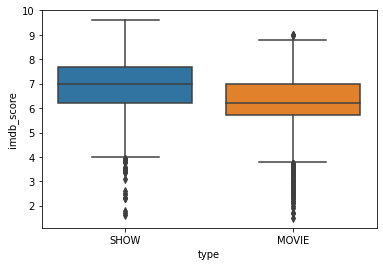

In [17]:
# aaron
sns.boxplot(x=data_df['type'], y = data_df['imdb_score'])

<AxesSubplot:xlabel='runtime', ylabel='imdb_score'>

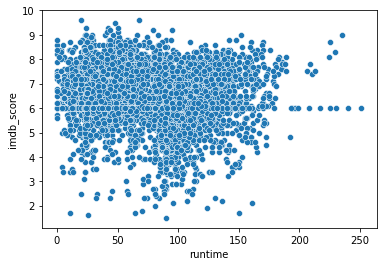

In [18]:
# angelita
sns.scatterplot(x=data_df['runtime'], y = data_df['imdb_score'])

based on this plot our data will be more biased towards movies/shows under 200 minutes, because we dont have much data for the movies/shows over 200 minutes. the runtime with both the highest and lowest scores (outliers) are between 0-100. while for movies/shows between 0-200 have an average range from 4-9 in score, over 200 is about 6.

<AxesSubplot:xlabel='type', ylabel='count'>

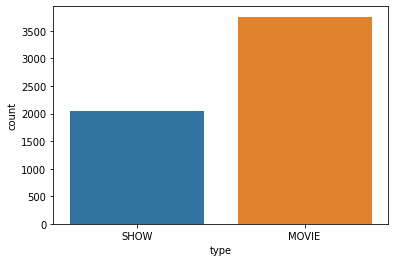

In [19]:
# angelita 

sns.countplot(x=netflix_df['type'])

there are a lot more movies than shows in this data set, so our data will be primarily calculated based off of that.


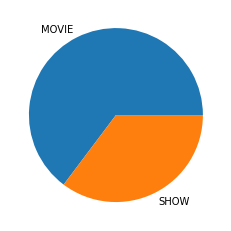

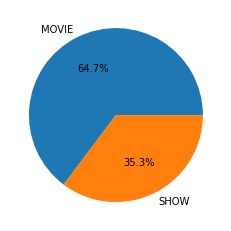

In [20]:
# angelita

labels = ['MOVIE','SHOW']

plt.pie(netflix_df['type'].value_counts(), labels = labels)
plt.show()

plt.pie(netflix_df['type'].value_counts(), labels = labels, autopct='%.1f%%')
plt.show()

In [21]:
movie_df = netflix_df.loc[netflix_df['type'] == 'MOVIE'].copy()
show_df = netflix_df.loc[netflix_df['type'] == 'SHOW'].copy()
show_df['id'] = np.arange(0,2047)


In [22]:
movie_df['id'] = np.arange(0,3758)

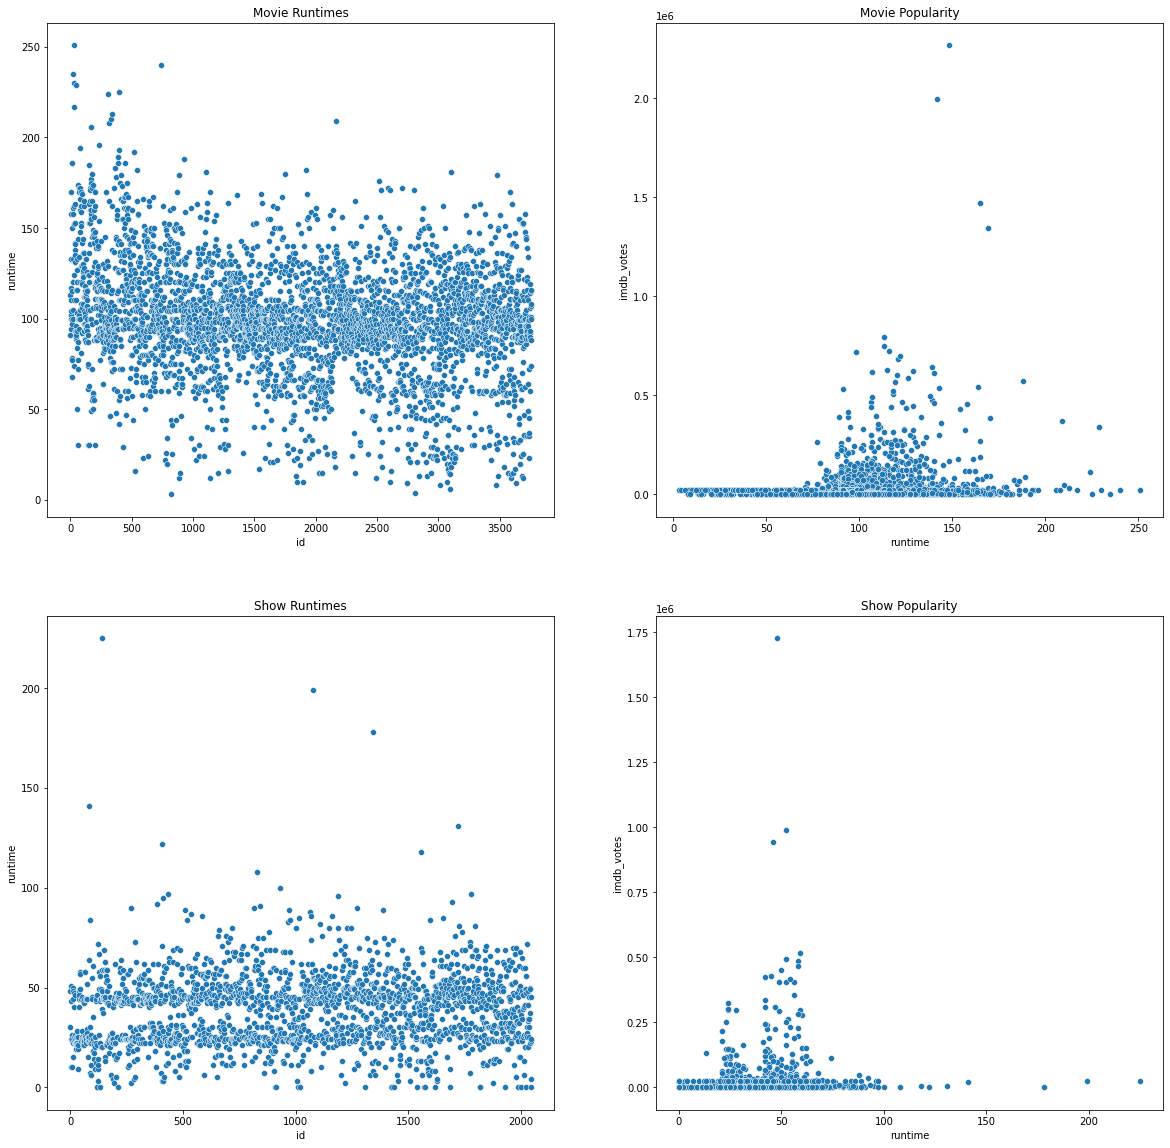

In [25]:
# aaron
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,20))

sns.scatterplot(x=movie_df['id'], y=movie_df['runtime'], ax=axes[0][0])
sns.scatterplot(x = movie_df['runtime'], y = movie_df['imdb_votes'], ax=axes[0][1])

sns.scatterplot(x=show_df['id'], y = show_df['runtime'], ax=axes[1][0])
sns.scatterplot(x=show_df['runtime'], y = show_df['imdb_votes'],ax=axes[1][1])
axes[0,0].set_title('Movie Runtimes')
axes[0,1].set_title("Movie Popularity")
axes[1,0].set_title('Show Runtimes')
axes[1,1].set_title("Show Popularity")
plt.show()

We wanted to see the run times of movies and shows, but decided to seperate each of them due to the fact that movies would have a greater runtime than a show. Some of the outliers were interesting in the shows category, since some extened to something that can be considered a movie, and how some movies have runtimes that can be considered a show, so either theres some missclassification in the data or a lot of shows/movies stray from the average. And another thing we were interested in was if runtime affected the amount of votes of a movie/show, since some movies/shows may be too long and attract less attention, this may not be the best classifier of popularity however, since this is sourcing from one website, and the general audience of netflix may not go out of there way to cast a vote for 

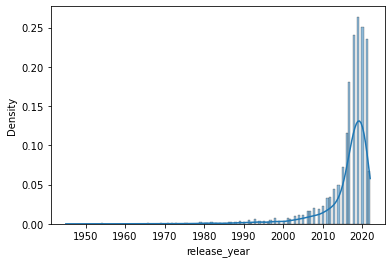

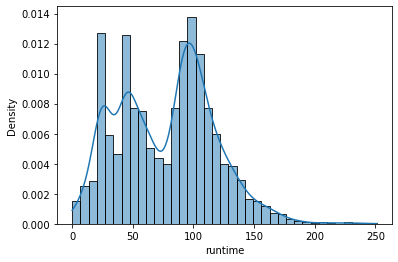

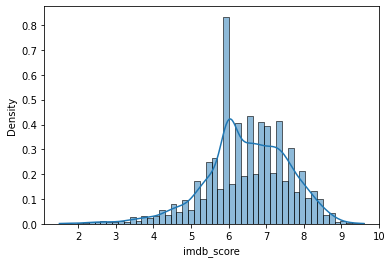

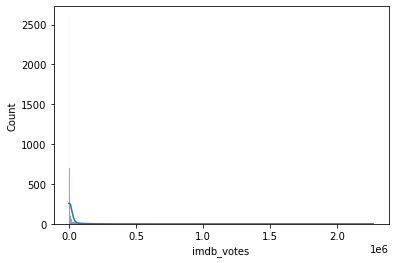

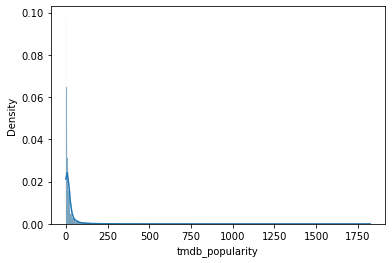

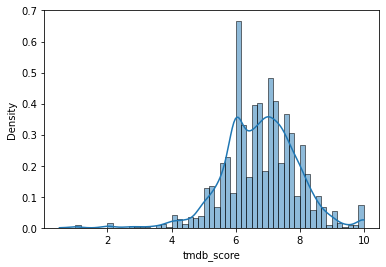

In [24]:
# angelita
sns.histplot(x=netflix_df['release_year'], kde=True, stat='density')
plt.show()
sns.histplot(x = netflix_df['runtime'], kde=True, stat='density')
plt.show()
sns.histplot(x=netflix_df['imdb_score'], kde=True, stat='density')
plt.show()
sns.histplot(x=netflix_df['imdb_votes'], kde=True)
plt.show()
sns.histplot(x=netflix_df['tmdb_popularity'], kde=True, stat='density')
plt.show()
sns.histplot(x=netflix_df['tmdb_score'], kde=True, stat='density')
plt.show()
plt.show()

We wanted to see the density of our continuous variables and how they were distributed within their own range of values. The most stand out one visually, release year, clearly shows how much more recent media is on netflix than old media. For runtime, we can see shows are usually about 30 mins or around 45 mins, and movies are usually around 110 mins. For tbdb popularity and imdb votes, they seem to be quite similar to one another, as their density distribututions seem to be about the same. As well as imdb scores and tmdb scores being around the same. Yet there seems to be more "good" shows than "bad" ones if we take the imdb scores and tmdb scores at face value with 5 as a threshold. 

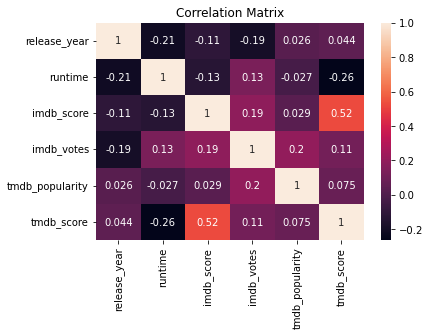

In [25]:
# angelita 

sns.heatmap(netflix_df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

There is no significant multicollinearity within our dataset. There is some multicollinearity between the tmdb sores and the imdb scores. Multicollinearity is when columns of a dataset are highly correlated to each other. We don't columns that are too correlated to each other, because it could affect the results of our predictions. You would check how close the values are to 1, that also being with a lighter color box between the data. 

In [26]:
#aaron
netflix_df = pd.get_dummies(data=netflix_df, columns=['type', 'genres', 'production_countries'])
# netflix_df.drop(labels=['type', 'genres', 'produciton_countries'], axis=1, inplace=True)
netflix_df.head()

,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,type_MOVIE,type_SHOW,"genres_['action', 'animation', 'comedy', 'crime', 'drama']","genres_['action', 'animation', 'comedy', 'drama', 'family', 'fantasy', 'scifi']",...,production_countries_['UY'],"production_countries_['VE', 'AR']",production_countries_['VN'],production_countries_['XX'],"production_countries_['ZA', 'CA']","production_countries_['ZA', 'GB']","production_countries_['ZA', 'US']",production_countries_['ZA'],production_countries_['ZW'],production_countries_[]
0,1945,48,6.0,23407.0,0.600,6.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1976,113,8.3,795222.0,27.612,8.2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1975,91,8.2,530877.0,18.216,7.8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1979,94,8.0,392419.0,17.505,7.8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1973,133,8.1,391942.0,95.337,7.7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#aaron
netflix_df['Good_score'] = netflix_df['imdb_score'].apply(lambda imdbScore : 1 if imdbScore >= 5.0 else 0)
netflix_df.head(50)

,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,type_MOVIE,type_SHOW,"genres_['action', 'animation', 'comedy', 'crime', 'drama']","genres_['action', 'animation', 'comedy', 'drama', 'family', 'fantasy', 'scifi']",...,"production_countries_['VE', 'AR']",production_countries_['VN'],production_countries_['XX'],"production_countries_['ZA', 'CA']","production_countries_['ZA', 'GB']","production_countries_['ZA', 'US']",production_countries_['ZA'],production_countries_['ZW'],production_countries_[],Good_score
0,1945,48,6.0,23407.0,0.600,6.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1976,113,8.3,795222.0,27.612,8.2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1975,91,8.2,530877.0,18.216,7.8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1979,94,8.0,392419.0,17.505,7.8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1973,133,8.1,391942.0,95.337,7.7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1969,30,8.8,72895.0,12.919,8.3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1971,102,7.7,153463.0,14.745,7.5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,1964,170,7.8,94121.0,15.949,7.6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,1980,104,5.8,69053.0,44.038,6.2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,1967,110,7.7,111189.0,15.309,7.5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Adding a column that holds a categorical variable for score, using a threshold of 5, if the score is >= 5, we use 1 else 0, we'll use this for our models if they're categorical.

# Scaling

1) Is it necessary to scale the data? What benefits would it provide? 

    - Yes it is necessary to scale the data, because it allows for the model to easily understand and learn the problem within the dataset. What these models do is finds the difference between the data and if the difference between the data points is too high, the model will need to provide a larger weight for those points causing the final results of the model to have a large weight value that, more often than not, is unstable.


2) Which scaler will you use for this data set? Min Max, Standard, Robust, etc. 

    
    *****************shaz and chi answer when you find out what the best scaler is********************

3) Are the features or the response variables scaled?

    - Both are scaled. This is because we need our features scaled for the model to have a better understanding of the data, and our response variables scaled so that the mean squared error is automatically scaled resulting in better interpretation of the model, in terms of good or bad.


****************shaz and chi adjust this answer to fit what you guys believe when doing the data processing***************



# Preprocessing

1) Which columns needed to be modified (dummy variables)? 
    - The columns that need to converted to dummies is the type, production country, and the genre.
		

2) What are parametric and nonparametric learning algos? For the models you are choosing- are they parametric or nonparametric? Explain. 
    - Parametric algorithms use fixed parameters as weights to make predictions, as we train our model, we adjust those parameters to make a better fit for our data, like linear and logistic regression. A non-parametric algorithm doesn’t use parameters to train and make predictions, such as k-means which doesn’t have any parameters. We will be using logistic regression, which is a parametric algorithm, and a SVM, which is parametric as well. 


****************shaz and chi adjust this answer to fit what kind of models you use in the data processing***************


3) Define label encoding and one hot encoding and compare them.
    - Label encoding is when we have ordinal categorical variables and they have some sort of rank to them, so we assign that rank in place of the categorical value. One-hot-encoding is when we have categorical variables that dont have a specific order to them so we create dummies for each unique type from that attribute and place 1 or 0 to show if that row has/doesn’t have that specific dummy attribute. 


## SVM

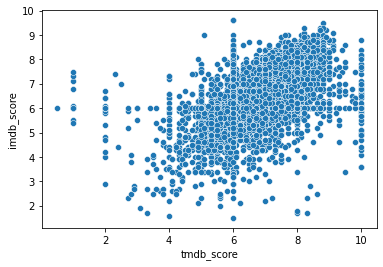

In [28]:
# chi
sns.scatterplot(x=netflix_df['tmdb_score'], y=netflix_df['imdb_score'])
plt.show()

Based on the heatmap, there is highest correlation between tmdb score and imdb score of .52, which is still not a large correlation.

Since we have changed the imdb ratings to either 1 for good rating or 0 for bad rating, we can use SVM to predict the outcome of a show or movie's rating. Also since we have added a good score column that will now be our target, we can drop the imdb rating column from our dataframe.

In [29]:
# chi
netflix_df.drop(columns=['imdb_score'], axis=1, inplace=True)
netflix_df.head()

,release_year,runtime,imdb_votes,tmdb_popularity,tmdb_score,type_MOVIE,type_SHOW,"genres_['action', 'animation', 'comedy', 'crime', 'drama']","genres_['action', 'animation', 'comedy', 'drama', 'family', 'fantasy', 'scifi']","genres_['action', 'animation', 'comedy', 'drama', 'family', 'western', 'documentation']",...,"production_countries_['VE', 'AR']",production_countries_['VN'],production_countries_['XX'],"production_countries_['ZA', 'CA']","production_countries_['ZA', 'GB']","production_countries_['ZA', 'US']",production_countries_['ZA'],production_countries_['ZW'],production_countries_[],Good_score
0,1945,48,23407.0,0.600,6.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1976,113,795222.0,27.612,8.2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1975,91,530877.0,18.216,7.8,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1979,94,392419.0,17.505,7.8,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1973,133,391942.0,95.337,7.7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
# chi
# check how many good and bad scores we have
netflix_df['Good_score'].value_counts()

1    5343
0     462
Name: Good_score, dtype: int64

We have 5343 good scores and 462 bad scores.

In [31]:
# chi
# Y is our target of prediction, which is the imdb score
Y = netflix_df['Good_score']

# X is our independent variables we are using to predict the score
X = netflix_df.drop(columns=['Good_score'])

X.head()

,release_year,runtime,imdb_votes,tmdb_popularity,tmdb_score,type_MOVIE,type_SHOW,"genres_['action', 'animation', 'comedy', 'crime', 'drama']","genres_['action', 'animation', 'comedy', 'drama', 'family', 'fantasy', 'scifi']","genres_['action', 'animation', 'comedy', 'drama', 'family', 'western', 'documentation']",...,production_countries_['UY'],"production_countries_['VE', 'AR']",production_countries_['VN'],production_countries_['XX'],"production_countries_['ZA', 'CA']","production_countries_['ZA', 'GB']","production_countries_['ZA', 'US']",production_countries_['ZA'],production_countries_['ZW'],production_countries_[]
0,1945,48,23407.0,0.600,6.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1976,113,795222.0,27.612,8.2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1975,91,530877.0,18.216,7.8,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1979,94,392419.0,17.505,7.8,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1973,133,391942.0,95.337,7.7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### SVM without scaling

In [32]:
# chi
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# when not specified, kernel used by sklearn.svm.SVC is rbf
# default C is 1.0
# default gamma is 1/n_features
model = SVC()

# fitting our model
model.fit(X_train, y_train)

SVC()

In [33]:
# chi
# make predictions with our SVM model
predictions = model.predict(X_test)

# print confusion matrix to see how well our model predicted
cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix:')
print(cm)
print('True Positives(TP) = ', cm[1,1])
print('True Negatives(TN) = ', cm[0,0])
print('False Positives(FP) = ', cm[1,0])
print('False Negatives(FN) = ', cm[0,1])

Confusion Matrix:
[[   0  140]
 [   0 1602]]
True Positives(TP) =  1602
True Negatives(TN) =  0
False Positives(FP) =  0
False Negatives(FN) =  140


Without scaling, our SVM model predicts good ratings perfectly but did not predict any bad ratings correctly.

In [34]:
# chi
# printing predictions to see how our model predicted
with np.printoptions(threshold=np.inf): print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

Without scaling, our SVM model made all predictions of 1.

In [35]:
# chi
# accuracy score
print("Accuracy score:")
print(accuracy_score(y_test, predictions))

# classification report for SVM using standard scaler
print(classification_report(y_test, predictions, zero_division=0))

Accuracy score:
0.9196326061997704
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       140
           1       0.92      1.00      0.96      1602

    accuracy                           0.92      1742
   macro avg       0.46      0.50      0.48      1742
weighted avg       0.85      0.92      0.88      1742



Since release_year, runtime, imdb votes, tmdb popularity and tmdb score columns have larger values, we need to scale our data. If we don't scale our data, features with larger values will be given more importance in our model, which can affect our model's prediction.

In [36]:
# chi
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# make 3 copies of dataset to try all 3 scalers
X_standard = netflix_df.copy()
X_robust = netflix_df.copy()
X_minmax = netflix_df.copy()

# the columns we do want to scale
scaled_cols = ['release_year', 'runtime', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']

# make 3 sets of features for the 3 scalers
standard_features = X_standard[scaled_cols]
robust_features = X_robust[scaled_cols]
minmax_features = X_minmax[scaled_cols]

# scaling our features
standard = StandardScaler().fit(standard_features.values)
robust = RobustScaler().fit(robust_features.values)
minmax = MinMaxScaler().fit(minmax_features.values)

# transforming our features
standard_features = standard.transform(standard_features.values)
robust_features = robust.transform(robust_features.values)
minmax_features = minmax.transform(minmax_features.values)

# replacing the original features with the scaled features
X_standard[scaled_cols] = standard_features
X_robust[scaled_cols] = robust_features
X_minmax[scaled_cols] = minmax_features

In [37]:
# chi
# our scaled data with standard scaler
X_standard

,release_year,runtime,imdb_votes,tmdb_popularity,tmdb_score,type_MOVIE,type_SHOW,"genres_['action', 'animation', 'comedy', 'crime', 'drama']","genres_['action', 'animation', 'comedy', 'drama', 'family', 'fantasy', 'scifi']","genres_['action', 'animation', 'comedy', 'drama', 'family', 'western', 'documentation']",...,"production_countries_['VE', 'AR']",production_countries_['VN'],production_countries_['XX'],"production_countries_['ZA', 'CA']","production_countries_['ZA', 'GB']","production_countries_['ZA', 'US']",production_countries_['ZA'],production_countries_['ZW'],production_countries_[],Good_score
0,-9.694861,-0.751447,-0.000002,-0.320946,-0.670114,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-5.462705,0.895604,9.300035,0.074605,1.236159,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-5.599226,0.338140,6.114792,-0.062985,0.889564,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-5.053141,0.414158,4.446433,-0.073397,0.889564,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-5.872269,1.402389,4.440685,1.066339,0.802915,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,0.680748,0.566194,-0.281576,-0.315586,-0.670114,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5802,0.680748,-0.092627,-0.000002,-0.314561,1.496106,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
5803,0.680748,0.262123,-0.281661,-0.319350,-0.670114,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5804,0.680748,0.971622,-0.281938,-0.297721,-0.670114,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [38]:
# chi
# our scaled data with robust scaler
X_robust

,release_year,runtime,imdb_votes,tmdb_popularity,tmdb_score,type_MOVIE,type_SHOW,"genres_['action', 'animation', 'comedy', 'crime', 'drama']","genres_['action', 'animation', 'comedy', 'drama', 'family', 'fantasy', 'scifi']","genres_['action', 'animation', 'comedy', 'drama', 'family', 'western', 'documentation']",...,"production_countries_['VE', 'AR']",production_countries_['VN'],production_countries_['XX'],"production_countries_['ZA', 'CA']","production_countries_['ZA', 'GB']","production_countries_['ZA', 'US']",production_countries_['ZA'],production_countries_['ZW'],production_countries_[],Good_score
0,-14.6,-0.590164,1.040897,-0.456471,-0.533333,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-8.4,0.475410,40.447360,1.277735,0.933333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-8.6,0.114754,26.950730,0.674499,0.666667,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-7.8,0.163934,19.881497,0.628852,0.666667,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-9.0,0.803279,19.857143,5.625770,0.600000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,0.6,0.262295,-0.152201,-0.432974,-0.533333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5802,0.6,-0.163934,1.040897,-0.428480,1.133333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
5803,0.6,0.065574,-0.152558,-0.449474,-0.533333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5804,0.6,0.524590,-0.153732,-0.354648,-0.533333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [39]:
# chi
# our scaled data with minmax scaler
X_minmax

,release_year,runtime,imdb_votes,tmdb_popularity,tmdb_score,type_MOVIE,type_SHOW,"genres_['action', 'animation', 'comedy', 'crime', 'drama']","genres_['action', 'animation', 'comedy', 'drama', 'family', 'fantasy', 'scifi']","genres_['action', 'animation', 'comedy', 'drama', 'family', 'western', 'documentation']",...,"production_countries_['VE', 'AR']",production_countries_['VN'],production_countries_['XX'],"production_countries_['ZA', 'CA']","production_countries_['ZA', 'GB']","production_countries_['ZA', 'US']",production_countries_['ZA'],production_countries_['ZW'],production_countries_[],Good_score
0,0.000000,0.191235,0.010317,0.000324,0.578947,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.402597,0.450199,0.350581,0.015138,0.810526,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.389610,0.362550,0.234041,0.009985,0.768421,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.441558,0.374502,0.173000,0.009595,0.768421,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.363636,0.529880,0.172790,0.052281,0.757895,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,0.987013,0.398406,0.000015,0.000525,0.578947,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5802,0.987013,0.294821,0.010317,0.000563,0.842105,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
5803,0.987013,0.350598,0.000012,0.000384,0.578947,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5804,0.987013,0.462151,0.000002,0.001194,0.578947,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


Looking at the scaled columns, minmax scaler seems to be the best one because we end up with no negative values and all our values fall within the range (0,1). To make sure, we will try SVM on all 3 scalers and see which gives us the best accuracy.

### SVM using Standard Scaler

In [40]:
# chi
# splitting train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_standard, Y, test_size=0.30, random_state=42)

model = SVC()
# fitting our model
model.fit(X_train, y_train)

SVC()

In [41]:
# chi
# make predictions with our SVM model
predictions = model.predict(X_test)

# print confusion matrix to see how well our model predicted
cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix:')
print(cm)
print('True Positives(TP) = ', cm[1,1])
print('True Negatives(TN) = ', cm[0,0])
print('False Positives(FP) = ', cm[1,0])
print('False Negatives(FN) = ', cm[0,1])

Confusion Matrix:
[[ 134    6]
 [   0 1602]]
True Positives(TP) =  1602
True Negatives(TN) =  134
False Positives(FP) =  0
False Negatives(FN) =  6


In [42]:
# chi
# accuracy score
print("Accuracy score:")
print(accuracy_score(y_test, predictions))

# classification report for SVM using standard scaler
print(classification_report(y_test, predictions))

Accuracy score:
0.9965556831228473
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       140
           1       1.00      1.00      1.00      1602

    accuracy                           1.00      1742
   macro avg       1.00      0.98      0.99      1742
weighted avg       1.00      1.00      1.00      1742



### SVM using Robust Scaler

In [43]:
# chi
# splitting train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_robust, Y, test_size=0.30, random_state=42)

model = SVC()
# fitting our model
model.fit(X_train, y_train)

SVC()

In [44]:
# chi
# make predictions with our SVM model
predictions = model.predict(X_test)

# print confusion matrix to see how well our model predicted
cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix:')
print(cm)
print('True Positives(TP) = ', cm[1,1])
print('True Negatives(TN) = ', cm[0,0])
print('False Positives(FP) = ', cm[1,0])
print('False Negatives(FN) = ', cm[0,1])

Confusion Matrix:
[[ 134    6]
 [   0 1602]]
True Positives(TP) =  1602
True Negatives(TN) =  134
False Positives(FP) =  0
False Negatives(FN) =  6


In [45]:
# chi
# accuracy score
print("Accuracy score:")
print(accuracy_score(y_test, predictions))

# classification report for SVM using standard scaler
print(classification_report(y_test, predictions))

Accuracy score:
0.9965556831228473
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       140
           1       1.00      1.00      1.00      1602

    accuracy                           1.00      1742
   macro avg       1.00      0.98      0.99      1742
weighted avg       1.00      1.00      1.00      1742



### SVM using MinMax Scaler

In [46]:
# chi
# splitting train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_minmax, Y, test_size=0.30, random_state=42)

model = SVC()
# fitting our model
model.fit(X_train, y_train)

SVC()

In [47]:
# chi
# make predictions with our SVM model
predictions = model.predict(X_test)

# print confusion matrix to see how well our model predicted
cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix:')
print(cm)
print('True Positives(TP) = ', cm[1,1])
print('True Negatives(TN) = ', cm[0,0])
print('False Positives(FP) = ', cm[1,0])
print('False Negatives(FN) = ', cm[0,1])

Confusion Matrix:
[[ 140    0]
 [   0 1602]]
True Positives(TP) =  1602
True Negatives(TN) =  140
False Positives(FP) =  0
False Negatives(FN) =  0


In [48]:
# chi
# accuracy score
print("Accuracy score:")
print(accuracy_score(y_test, predictions))

# classification report for SVM using standard scaler
print(classification_report(y_test, predictions))

Accuracy score:
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00      1602

    accuracy                           1.00      1742
   macro avg       1.00      1.00      1.00      1742
weighted avg       1.00      1.00      1.00      1742



MimMax Scaler, as we suspected, gave us the best prediction accuracy.

Since we have perfect predictions with MinMaxScaler. We can test the use of Grid Search on one of the other scalers.

### Hyperparameter Tuning on SVM with Robust Scaler

In [49]:
# chi
from sklearn.model_selection import GridSearchCV
# splitting train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_robust, Y, test_size=0.30, random_state=42)

# parameters we're going to try
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']} 

# our grid with the parameters
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

# testing the parameters to find the best ones
grid.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.921 total time=   7.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   7.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   7.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.921 total time=   7.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.921 total time=   7.6s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.7s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   1.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   1.8s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   1.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   1.7s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.998 total time=   1.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             verbose=3)

In [52]:
# chi
# best parameters found
print("Best parameters found with Grid Search:")
grid.best_params_

Best parameters found with Grid Search:


{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [53]:
# chi
# rerunning predictions with the grid parameters found
grid_predictions = grid.predict(X_test)

cm = confusion_matrix(y_test, grid_predictions)
print('Confusion Matrix:')
print(cm)
print('True Positives(TP) = ', cm[1,1])
print('True Negatives(TN) = ', cm[0,0])
print('False Positives(FP) = ', cm[1,0])
print('False Negatives(FN) = ', cm[0,1])

# accuracy score
print("Accuracy score:")
print(accuracy_score(y_test, predictions))

print(classification_report(y_test,grid_predictions))

Confusion Matrix:
[[ 140    0]
 [   0 1602]]
True Positives(TP) =  1602
True Negatives(TN) =  140
False Positives(FP) =  0
False Negatives(FN) =  0
Accuracy score:
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00      1602

    accuracy                           1.00      1742
   macro avg       1.00      1.00      1.00      1742
weighted avg       1.00      1.00      1.00      1742



Using Grid Search, we now have perfect accuracy with Robust Scaler.